In [1]:
import pandas as pd

In [2]:
# Load the dataset (replace 'file_path' with the actual file path on your system)
accidents_df = pd.read_csv("C:/Users/SEI-LP95/Downloads/archive (3)/US_Accidents_March23.csv")

In [3]:
# Display the first few rows of the dataset
print(accidents_df.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [4]:
# Get a summary of the dataset
print(accidents_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
# Check for missing values
print(accidents_df.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

# Data Cleaning and Preprocessing

In [6]:
# Drop columns with a high percentage of missing values
accidents_df = accidents_df.drop(columns=['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)'])

In [7]:
# Fill missing values in numerical columns with the median
accidents_df['Temperature(F)'].fillna(accidents_df['Temperature(F)'].median(), inplace=True)
accidents_df['Humidity(%)'].fillna(accidents_df['Humidity(%)'].median(), inplace=True)
accidents_df['Pressure(in)'].fillna(accidents_df['Pressure(in)'].median(), inplace=True)
accidents_df['Visibility(mi)'].fillna(accidents_df['Visibility(mi)'].median(), inplace=True)
accidents_df['Wind_Speed(mph)'].fillna(accidents_df['Wind_Speed(mph)'].median(), inplace=True)

In [8]:
# Fill missing values in categorical columns with the mode
accidents_df['Weather_Condition'].fillna(accidents_df['Weather_Condition'].mode()[0], inplace=True)
accidents_df['Wind_Direction'].fillna(accidents_df['Wind_Direction'].mode()[0], inplace=True)

In [9]:
# Drop rows where critical data is missing
accidents_df.dropna(subset=['Description', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp'], inplace=True)

In [10]:
# Convert Start_Time and End_Time to datetime
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'])
accidents_df['End_Time'] = pd.to_datetime(accidents_df['End_Time'])

In [11]:
# Extract hour, day, month, and year
accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour
accidents_df['DayOfWeek'] = accidents_df['Start_Time'].dt.dayofweek
accidents_df['Month'] = accidents_df['Start_Time'].dt.month
accidents_df['Year'] = accidents_df['Start_Time'].dt.year

In [12]:
# Check for remaining missing values
print(accidents_df.isnull().sum())

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Description                  0
Street                       0
City                         0
County                       0
State                        0
Zipcode                      0
Country                      0
Timezone                     0
Airport_Code                 0
Weather_Timestamp            0
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction               0
Wind_Speed(mph)              0
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabo

In [13]:
# Check the data types of the columns
print(accidents_df.dtypes)

ID                               object
Source                           object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Weather_Condition                object


In [14]:
# Save the cleaned dataset
accidents_df.to_csv('cleaned_US_Accidents_Dataset.csv', index=False)

# Visualize Accident Frequency by Time of Day

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

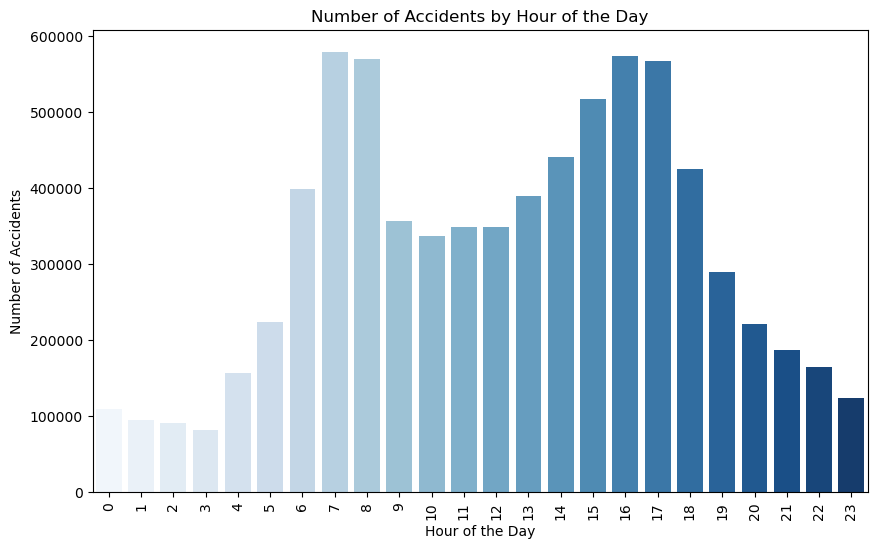

In [16]:
# Bar plot for accidents by hour of the day
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=accidents_df, palette='Blues')
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

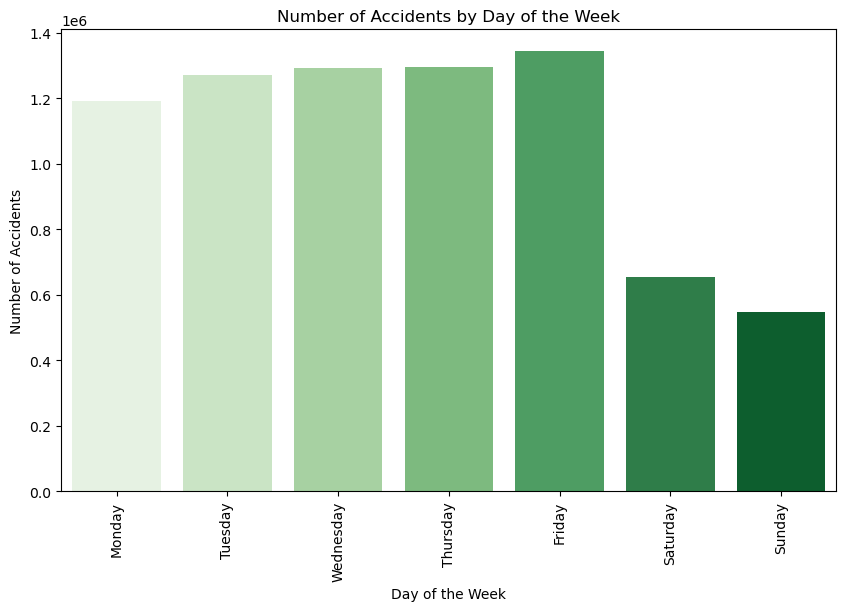

In [17]:
# Bar plot for accidents by day of the week
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=accidents_df, palette='Greens')

# Set the labels for the x-ticks
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

# Get the current tick locations and set new labels
current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks, labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)

# Show the plot
plt.show()

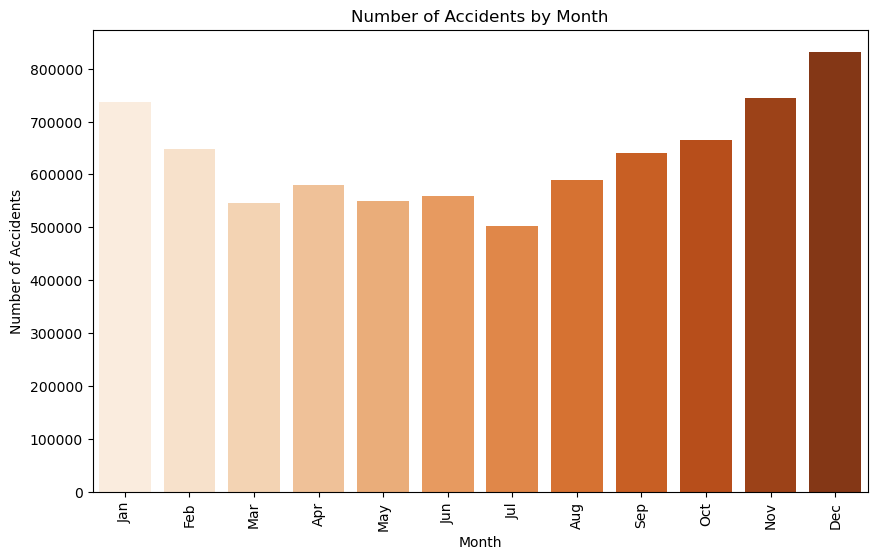

In [18]:
# Bar plot for accidents by month
plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=accidents_df, palette='Oranges')

# Set the labels for the x-ticks
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

# Get the current tick locations and set new labels
current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)

# Show the plot
plt.show()

# Visualize Accident Frequency by Weather and Road Conditions

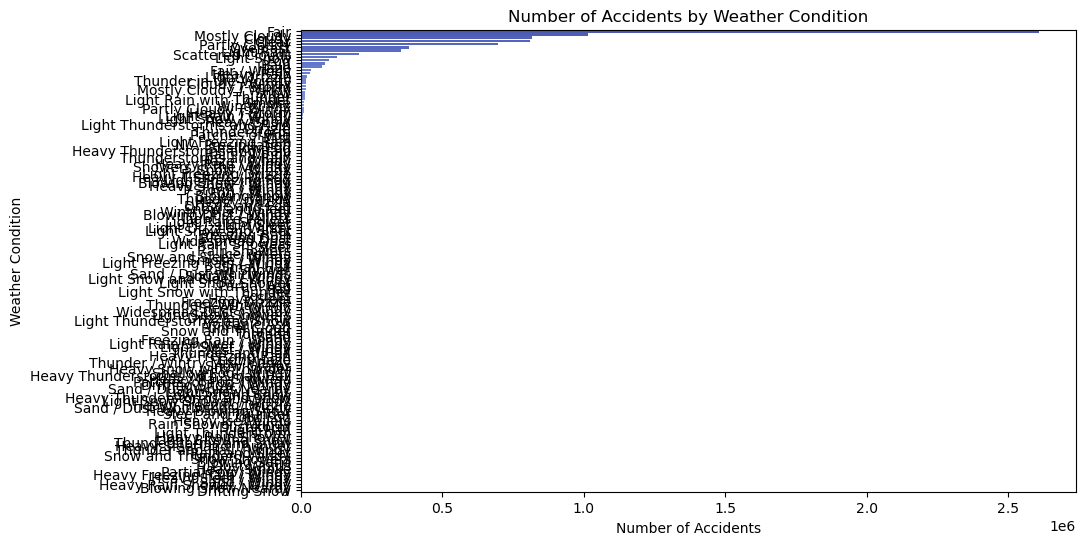

In [29]:
# Bar plot for accidents by weather condition
plt.figure(figsize=(10,6))
sns.countplot(y='Weather_Condition', data=accidents_df, order=accidents_df['Weather_Condition'].value_counts().index, palette='coolwarm')
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

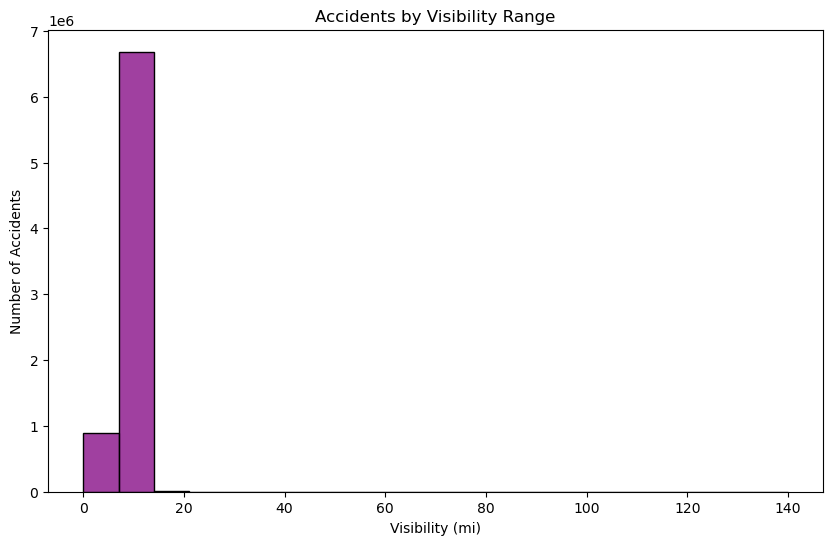

In [20]:
# Plot accidents by visibility range
plt.figure(figsize=(10,6))
sns.histplot(accidents_df['Visibility(mi)'], bins=20, kde=False, color='purple')
plt.title('Accidents by Visibility Range')
plt.xlabel('Visibility (mi)')
plt.ylabel('Number of Accidents')
plt.show()

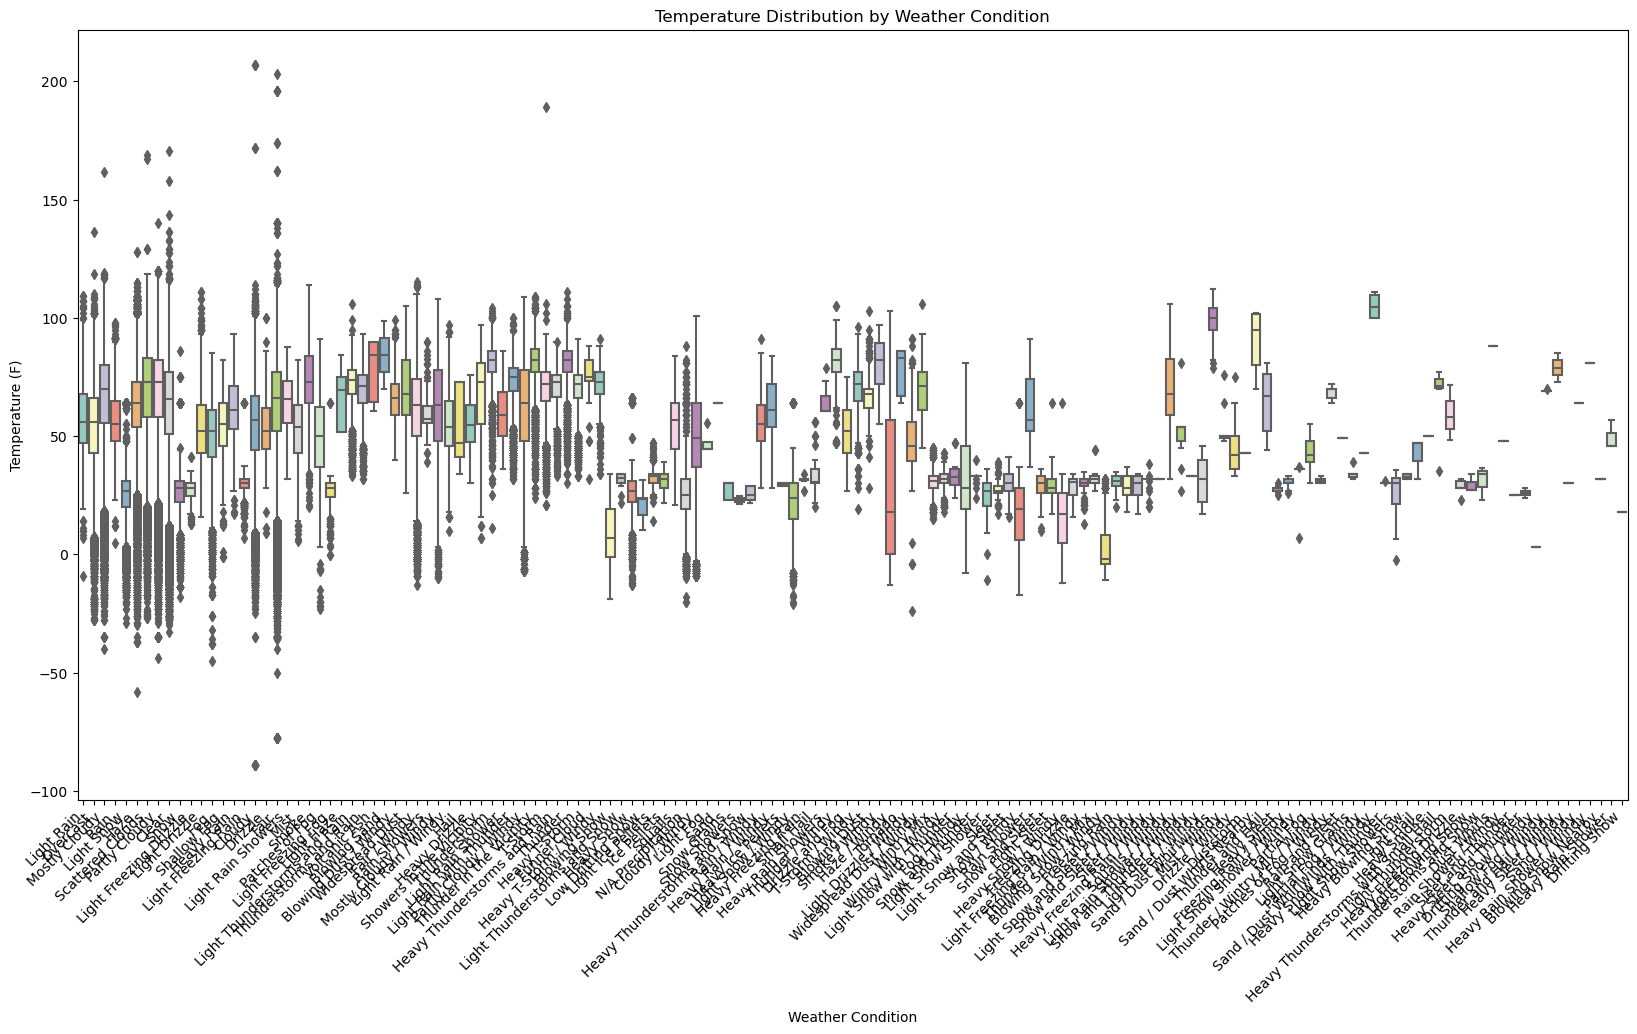

In [27]:
# Box plot to see the distribution of temperatures during accidents
plt.figure(figsize=(20,10))  # Increase the figure size for better spacing
sns.boxplot(x='Weather_Condition', y='Temperature(F)', data=accidents_df, palette='Set3')

# Set the title and labels
plt.title('Temperature Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (F)')

# Rotate the x-axis labels to make them readable
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right

# Show the plot
plt.show()


# Visualize Accident Hotspots (Geographical Analysis)

In [22]:
!pip install folium

In [23]:
import folium
from folium.plugins import HeatMap

# Create a map centered at the mean location
map_center = [accidents_df['Start_Lat'].mean(), accidents_df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=5)

# Prepare data for the heatmap
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in accidents_df.iterrows()]

# Add the heatmap
HeatMap(heat_data).add_to(accident_map)

# Display the map
accident_map.save('accident_heatmap.html')
